<a href="https://colab.research.google.com/github/Jhuliani/search-agent/blob/main/search_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install virtualenv
!virtualenv genai_env

created virtual environment CPython3.12.12.final.0-64 in 280ms
  creator CPython3Posix(dest=/content/genai_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==25.3
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source genai_env/bin/activate

In [ ]:
%pip install -U google-generativeai
%pip install -U langchain
%pip install -U langchain-google-genai
%pip install -U langchain-community
%pip install -U langgraph
%pip install -U arxiv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.9.0
    Uninstalling google-ai-generativelanguage-0.9.0:
      Successfully uninstalled google-ai-generativelanguage-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 3.1.0 requires google-ai-generativelanguage<1.0.0,>=0.9.0, but you have google-ai-generativelanguage 0.6.15 which is incompatible.


  Using cached google_ai_generativelanguage-0.9.0-py3-none-any.whl.metadata (10 kB)
Using cached google_ai_generativelanguage-0.9.0-py3-none-any.whl (1.4 MB)
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.9.0 which is incompatible.


  Using cached arxiv-2.3.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached feedparser-6.0.12-py3-none-any.whl.metadata (2.7 kB)
  Using cached sgmllib3k-1.0.0.tar.gz (5.8 kB)
  Preparing metadata (setup.py) ... done
Using cached arxiv-2.3.1-py3-none-any.whl (11 kB)
Using cached feedparser-6.0.12-py3-none-any.whl (81 kB)
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=bffbcda8a30c2bf9e0de5f34af4d32601bf6ee41d3e7005088d6406e94a62a66
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


In [ ]:
from google.colab import userdata
import os
api_key = userdata.get('GEMINI_API_KEY')
os.environ['GEMINI_API_KEY']= api_key

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash')

In [ ]:
from langchain_core.prompts import PromptTemplate

In [ ]:
modelo_de_prompt = PromptTemplate(
    template="Me diga quais os impactos da IA no assunto {assunto}",
    input_variables=['assunto']
)

In [ ]:
from langchain_core.output_parsers import StrOutputParser

In [ ]:
cadeia = modelo_de_prompt | llm | StrOutputParser()

In [ ]:
resposta = cadeia.invoke({'assunto':'Agricultura'})

In [ ]:
print(resposta)

A Inteligência Artificial (IA) está transformando a agricultura de diversas maneiras, impactando desde o plantio até a distribuição dos alimentos. Aqui estão alguns dos principais impactos da IA na agricultura:

**1. Aumento da Eficiência e Produtividade:**

*   **Agricultura de Precisão:** A IA permite a coleta e análise de dados detalhados sobre o solo, clima, umidade e saúde das plantas. Com isso, é possível otimizar o uso de recursos como água, fertilizantes e pesticidas, aplicando-os apenas onde e quando necessário.
*   **Monitoramento e Diagnóstico:** Drones e sensores equipados com IA podem monitorar lavouras em tempo real, identificando pragas, doenças e deficiências nutricionais precocemente. Isso permite intervenções rápidas e direcionadas, evitando perdas significativas na produção.
*   **Automação:** Robôs e máquinas autônomas podem realizar tarefas como plantio, colheita, pulverização e irrigação com maior precisão e eficiência do que os métodos tradicionais. Isso reduz a 

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool

In [ ]:
os.environ['TAVILY_API_KEY'] = userdata.get('tavily')

In [ ]:
@tool
def busca_web(query: str) -> list:
    """
    Busca na web por um termo específico
    """
    tavily_search = TavilySearchResults(max_results=2, search_depth='advanced', max_tokens=1000)
    resultado_busca = tavily_search.invoke(query)
    return resultado_busca

In [ ]:
tools = [busca_web]

In [ ]:
llm_com_ferramenta = llm.bind(tools=tools)

In [ ]:
modelo_de_prompt = PromptTemplate(
    template="Usando apenas as tools disponíveis me diga quais os impactos da IA no assunto {assunto}",
    input_variables=['assunto']
)

In [ ]:
cadeia = modelo_de_prompt | llm_com_ferramenta | StrOutputParser()

In [ ]:
resposta = cadeia.invoke({"assunto":"Agricultura"})
resposta

''

In [ ]:
from langchain.agents import create_agent

In [ ]:
system_prompt = """Atue como um assistente útil
    Use as ferramentas fornecidas para responder às perguntas do usuário.
    -busca_web: Retorna os resultados de uma busca na web.
    Use a busca_web sempre que o usuário fizer uma pergunta sobre um tema específico e retorne o link dos artigos na resposta
"""

In [ ]:
agente_web = create_agent(
    model=llm,
    tools=tools,
    system_prompt=system_prompt
)

In [ ]:
resultado = agente_web.invoke({"messages":[("user", "Quais os impactos da IA na agricultura")]})
resultado

{'messages': [HumanMessage(content='Quais os impactos da IA na agricultura', additional_kwargs={}, response_metadata={}, id='b34ee629-0406-41f9-a734-4ed05c25ab12'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'busca_web', 'arguments': '{"query": "impactos da IA na agricultura"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--5417d595-393e-4c69-bf73-81c9bfa82a87-0', tool_calls=[{'name': 'busca_web', 'args': {'query': 'impactos da IA na agricultura'}, 'id': 'b1a0381a-7d62-423d-b8e1-f4daaa608675', 'type': 'tool_call'}], usage_metadata={'input_tokens': 86, 'output_tokens': 10, 'total_tokens': 96, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='[{"title": "Futuro da agricultura: como a IA vai movimentar R$ 23,6 bilhões em ...", "url": "https://forbes.com.br/forbesagro/2024/04/futuro-da

In [ ]:
print(resultado["messages"][-1].content)


A IA está trazendo inúmeros benefícios para a agricultura, incluindo:

* **Aumento da produtividade:** A IA pode ajudar os agricultores a otimizar o uso de recursos como fertilizantes e água, o que pode levar a um aumento na produtividade.
* **Redução de custos:** A IA pode ajudar os agricultores a reduzir custos, automatizando tarefas e otimizando o uso de recursos.
* **Melhora da qualidade dos produtos:** A IA pode ajudar os agricultores a melhorar a qualidade dos produtos, monitorando as condições das plantações e identificando problemas precocemente.
* **Sustentabilidade:** A IA pode ajudar os agricultores a reduzir o impacto ambiental da agricultura, otimizando o uso de recursos e reduzindo o uso de produtos químicos.

No entanto, a IA também apresenta alguns riscos para a agricultura, incluindo:

* **Deslocamento de empregos:** A IA pode automatizar tarefas tradicionalmente realizadas por humanos, o que pode levar à perda de empregos.
* **Concentração de propriedade:** A IA pode 

In [ ]:
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain_community.utilities.arxiv import ArxivAPIWrapper

In [ ]:
tool_cientifica = ArxivQueryRun(api_wrapper=ArxivAPIWrapper())

In [ ]:
system_prompt2 = """ Atue como um assistente útil.
Use as ferramentas fornecidas para responder às perguntas do usuário.
- tool_cientifica: Retorna os resultados de uma busca no arxiv.
Use a tool_cientifica sempre que o usuário fizer uma pergunta sobre um tema específico e retorne o titulo dos artigos.
"""

In [ ]:
agente_cientifico = create_agent(
    model=llm,
    tools=tools,
    system_prompt=system_prompt2
)

In [ ]:
resultado = agente_cientifico.invoke({"messages":[("user", "AI impact in agriculture")]})

In [ ]:
print(resultado["messages"][-1].content)

AI is having a significant impact on agriculture, offering opportunities to enhance crop yield and quality, optimize resource usage, and improve farming practices. Here are some of the key applications of AI in agriculture:

*   **Crop Monitoring and Disease Detection:** AI-powered systems can analyze images from satellites and drones to monitor crop health and detect diseases early on.
*   **Precision Irrigation:** AI can help optimize irrigation by analyzing data on soil moisture, weather conditions, and plant needs.
*   **Weed Control:** AI-powered robots can identify and remove weeds, reducing the need for herbicides.
*   **Yield Prediction:** AI algorithms can analyze various factors to predict crop yields, helping farmers make informed decisions.

Here are some resources with more information:

*   [7 Applications of AI in Agriculture | 2024 Updated](https://www.basic.ai/blog-post/7-applications-of-ai-in-agriculture)
*   [Revolutionizing agriculture: A comprehensive review on art

In [ ]:
from typing import TypedDict

In [ ]:
class AgentState(TypedDict):
    user_query: str
    web_answer: str
    scientific_answer: str
    final_answer: str

In [ ]:
def funcao_agente_web(state: AgentState) -> str:
    """
        Função que executa um agente no estilo React que realiza uma busca na web por um termo específico.

        Esta função pega o estado atual do agente (que contém a pergunta do usuário) e cria um agente usando o Gemini e a ferramenta tavily
        e retorna a resposta do agente.

        Args:
            state: (AgentState): Um dicionário contendo a pergunta do usuário e a resposta do agente.

        Returns:
            str: A resposta do agente.
    """

    system_prompt = """ Atue como um assistente útil.
    Use as ferramentas fornecidas para responder às peguntas do usuário.
    - busca_web: Retorna os resultados de uma busca na web.
    Use a busca_web sempre que o usuário fizer uma pergunta sobre um tema específico e retorne o link dos artigos
    """

    agente_web = create_agent(model=llm, tools=tools, system_prompt=system_prompt)
    resultado = agente_web.invoke({"messages": [("user", state["user_query"])]})
    resposta_final = resultado['messages'][-1].content
    return {"web_answer": resposta_final}

In [ ]:
def funcao_agente_cientifico(state: AgentState) -> dict:
    """
    Função que executa um agente no estilo ReAct que realiza uma busca no arxiv
    por um termo específico.

    Esta função pega o estado atual do agente (que contém a pergunta do usuário) e
    cria um agente usando o Gemini e a ferramenta arxiv e retorna a resposta do agente.

    Args:
        state: (AgentState): Um dicionário contendo a pergunta do usuário e a resposta do agente.

    Returns:
        str: A resposta do agente.
    """
    system_prompt = """ Atue como um assistente útil.
     Use as ferramentas fornecidas para responder às perguntas do usuário.
     - tool_cientifica: Retorna os resultados de uma busca no arxiv.
     Use a tool_cientifica sempre que o usuário fizer uma pergunta sobre um tema específico e retorne o título dos artigos.
    """
    agente_cientifico = create_agent(model=llm, tools=[tool_cientifica], system_prompt=system_prompt)
    resultado = agente_cientifico.invoke({"messages": [("user", state["user_query"])]})
    resposta_final = resultado['messages'][-1].content
    return {"scientific_answer": resposta_final}

In [ ]:
from langgraph.graph import START, StateGraph, END

In [ ]:
workflow = StateGraph(AgentState)

In [ ]:
workflow.add_node("agente_web", funcao_agente_web)

workflow.add_edge(START, "agente_web")
workflow.add_edge("agente_web", END)

app = workflow.compile()

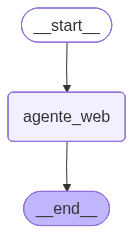

In [ ]:
from IPython.display import Image, display
Image(app.get_graph().draw_mermaid_png())

In [ ]:
resultado = app.invoke({"user_query": "Qual o impacto da IA na medicina?"})
print(resultado["web_answer"])

O impacto da IA na medicina é vasto e está transformando a forma como os cuidados de saúde são prestados. Aqui estão alguns dos principais pontos:

*	**Diagnóstico aprimorado:** A IA tem demonstrado precisão impressionante na detecção de doenças, como câncer de pele e pneumonia, através da análise de imagens médicas. Ela também agiliza e otimiza processos de diagnóstico, resultando em tratamentos mais rápidos e eficazes.
*	**Medicina personalizada:** A IA potencializa a personalização dos cuidados de saúde, permitindo que os médicos adaptem terapias e tratamentos de acordo com o perfil genético e histórico médico individual de cada paciente.
*	**Aplicações em diversas áreas:** A IA está sendo amplamente utilizada em áreas como oncologia, cardiologia e medicina de emergência. Ela também auxilia na previsão de tratamentos e na análise de prontuários eletrônicos.
*	**Desafios éticos e regulatórios:** É importante destacar que a implementação da IA na medicina diagnóstica não está isenta d

In [ ]:
def supervisor_node(state: AgentState) -> dict:
    """Combina os resultados da web e de agentes clientificos e formata a resposta final.
    Args:
        state (AgentState): O estado atual do agente, contendo web_answer e scientific_answer.
    Returns:
        dict: Um dicionário contendo a resposta final combinada e formatada.
    """
    web_results = state.get("web_answer", "Não foi realizada pesquisa na Web.")
    scientific_results = state.get("scientific_answer", "Não foi realizada a pesquisa cientifica")

    final_answer = '## Resultados de pesquisa combinados\n\n'
    final_answer += '## Resultados de pesquisa Web\n\n'
    final_answer += web_results
    final_answer += '\n\n## Resultados de Artigos Cientificos\n'
    final_answer += scientific_results

    return {"final_answer": final_answer}

In [ ]:
workflow = StateGraph(AgentState)

workflow.add_node("web_search", funcao_agente_web)
workflow.add_node("scientific_search", funcao_agente_cientifico)
workflow.add_node("supervisor", supervisor_node)

workflow.add_edge(START, "web_search")
workflow.add_edge("web_search", "scientific_search")
workflow.add_edge("scientific_search", "supervisor")
workflow.add_edge("supervisor", END)

app = workflow.compile()


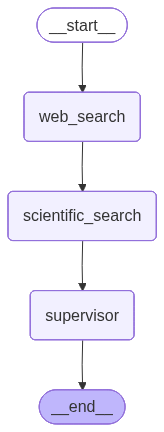

In [ ]:
Image(app.get_graph().draw_mermaid_png())

In [ ]:
resultado = app.invoke({"user_query": "Qual o impacto da IA na medicina?"})
print(resultado["final_answer"])

## Resultados de pesquisa combinados

## Resultados de pesquisa Web

A inteligência artificial (IA) está causando um grande impacto na medicina, revolucionando a forma como as doenças são diagnosticadas e tratadas. A IA tem demonstrado uma precisão impressionante na detecção de doenças, como câncer de pele e pneumonia, através da análise de imagens médicas. Além disso, ela agiliza e otimiza os processos de diagnóstico, resultando em tratamentos mais rápidos e eficazes. A personalização dos cuidados de saúde é potencializada pela IA, permitindo que os médicos adaptem terapias e tratamentos de acordo com o perfil genético e histórico médico individual de cada paciente.

A IA tem sido amplamente aplicada em sistemas de apoio à decisão clínica, como redes bayesianas dinâmicas para prever a evolução de doenças e resultados de tratamentos. A revisão revelou benefícios, como maior precisão diagnóstica e eficiência.

Os artigos também destacam desafios éticos e regulatórios, como a privacidade

In [ ]:
def router_agent(state: AgentState) -> dict:
    """
    Agente roteador que decide qual ferramenta usar com base na pergunta do usuario, usando um agente ReAct interno.
    """
    router_prompt = """
    Você é um agente roteador. Sua tarefa é decidir qual o agente é mais apropriado
    para responder à pergunta do usuário.

    Pergunta do usuário: {user_query}

    Você pode escolher entre as seguintes opções:
    - web_search: Use esta opção se a pergunta do usuário parecer exigir uma busca geral na web.
    - scientific_search: Use esta opção se a pergunta do usuário parecer exigir a busca por artigos científicos.

    Responda APENAS com o nome da opção escolhida (web_search ou scientific_search).
    """
    router_agent_instance = create_agent(model=llm, tools=[], system_prompt=router_prompt)

    response = router_agent_instance.invoke({"messages": [("user", state["user_query"])]})

    decision = response['messages'][-1].content.strip().lower()

    if 'web_search' in decision:
        decision = 'web_search'
    elif 'scientific_search' in decision:
        decision = 'scientific_search'
    else:
        decision = 'web_search'
    return {"router_decision": decision}

In [ ]:
workflow = StateGraph(AgentState)

workflow.add_node("router", router_agent)
workflow.add_node("web_search", funcao_agente_web)
workflow.add_node("scientific_search", funcao_agente_cientifico)
workflow.add_node("supervisor", supervisor_node)

workflow.add_edge(START, "router")
workflow.add_conditional_edges(
    "router",
    lambda state: state["router_decision"],
    {
        "web_search": "web_search",
        "scientific_search": "scientific_search"
    }
)
workflow.add_edge("web_search", "supervisor")
workflow.add_edge("scientific_search", "supervisor")
workflow.add_edge("supervisor", END)

app = workflow.compile()

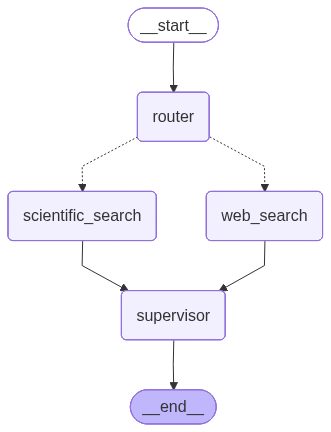

In [ ]:
Image(app.get_graph().draw_mermaid_png())

In [ ]:
resultado = app.invoke({"user_query": "Qual o impacto da IA na medicina?Use apenas fontes da web"})
print(resultado["final_answer"])

## Resultados de pesquisa combinados

## Resultados de pesquisa Web

O impacto da IA na medicina é notável, revolucionando a forma como doenças são diagnosticadas e tratadas. Ela tem demonstrado precisão na detecção de doenças como câncer de pele e pneumonia através da análise de imagens médicas, além de otimizar processos de diagnóstico, tornando-os mais rápidos e eficazes. A IA também personaliza os cuidados de saúde, adaptando terapias e tratamentos de acordo com o perfil individual de cada paciente.

A IA é amplamente utilizada em sistemas de apoio à decisão clínica, como redes bayesianas dinâmicas, para prever a evolução de doenças e resultados de tratamentos. Estudos revelam benefícios como maior precisão diagnóstica e eficiência.

Artigos sobre o tema:
*   IMPACTO DA TECNOLOGIA DE INTELIGÊNCIA ARTIFICIAL NA ...: [https://periodicorease.pro.br/rease/article/view/10699](https://periodicorease.pro.br/rease/article/view/10699)
*   Impacto da Inteligência Artificial na Medicina: Revi

In [ ]:
resultado = app.invoke({"user_query": "Qual o impacto da IA na medicina?Use apenas fontes cientificas"})
print(resultado["final_answer"])

## Resultados de pesquisa combinados

## Resultados de pesquisa Web

Não foi realizada pesquisa na Web.

## Resultados de Artigos Cientificos
Aqui estão alguns artigos sobre o impacto da IA na medicina:

* **Pose-free 3D Gaussian splatting via shape-ray estimation** por Youngju Na, Taeyeon Kim, Jumin Lee, Kyu Beom Han, Woo Jae Kim, Sung-eui Yoon: Este artigo apresenta uma nova estrutura de Gaussian splatting feed-forward, sem pose, que supera essas ambiguidades por meio da forma conjunta e estimativa de raios da câmera.
* **The effects of individual metal contents on isochrones for C, N, O, Na, Mg, Al, Si, and Fe** por Minje Beom, Chongsam Na, Jason W. Ferguson, Y. -C. Kim: As características individuais de C, N, O, Na, Mg, Al, Si e Fe em isócronas foram investigadas neste estudo.
* **Type Ia Supernova Models and Progenitor Scenarios** por Ken'ichi Nomoto, Yasuomi Kamiya, Naohito Nakasato: Analisamos alguns desenvolvimentos recentes em estudos teóricos sobre a conexão entre os sistemas

In [ ]:
import gradio as gr

def run_graph(user_query):
    """
        Executa o LangGraph com a query do usuário e retorna a resposta final.
    """
    result = app.invoke({"user_query": user_query})
    return result["final_answer"]

iface = gr.Interface(
    fn=run_graph,
    inputs=gr.Textbox(label='Digite sua pergunta:'),
    outputs=gr.Markdown(label='Resposta final:'),
    title='Agente de pesquisa',
    description="Faça uma pergunta e obtenha uma resposta com fontes web ou fontes científicas"
)

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4b15a83f72a15643d9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
